# Dataset description

A proprietary dataset derived from a real-time IoT infrastructure, is presented as a comprehensive resource integrating a wide range of IoT devices and sophisticated network attack methodologies. This dataset encompasses both normal and adversarial network behaviors, providing a general representation of real-world scenarios. By incorporating data from IoT devices such as ThingSpeak-LED, Wipro-Bulb, and MQTT-Temp, as well as simulated attack scenarios including brute-force SSH attacks, DDoS attacks with Hping and Slowloris, and Nmap patterns, the dataset offers a detailed perspective on the complex nature of network traffic. The bidirectional attributes of network traffic are meticulously captured using the Zeek network monitoring tool and the Flowmeter plugin. Researchers can leverage this dataset to enhance the capabilities of intrusion detection systems (IDS), fostering the development of robust and adaptable security solutions for real-time IoT networks.

The dataset was generated within a controlled testbed environment designed to simulate realistic traffic in IoT networks. This network included both "victim" and "attacker" devices, using Wireshark to capture both legitimate and malicious traffic in PCAP files. The data ranges from normal communications from devices like Raspberry Pi and Amazon Alexa to intentionally generated attack traffic, such as brute-force SSH attacks and DDoS attacks.


# Variable description

- Port numbers (id.orig_p, id.resp_p): Integer characteristics that indicate the source and destination ports in a network communication, providing information about the services used.

- Protocol (proto): Categorical characteristic that specifies the communication protocol, such as TCP, UDP, ICMP, etc.

- Service (service): Can represent the application layer service or protocol in use (such as HTTP, FTP, DNS). It might be incorrectly labeled as continuous if it is actually categorical.

- Flow duration (flow_duration): Continuous characteristic that represents the total time a flow existed, typically in seconds or milliseconds.

- Packet count (fwd_pkts_tot, bwd_pkts_tot): Integer characteristics that count the total number of packets sent in the forward or backward direction.

- Packet count with data (fwd_data_pkts_tot, bwd_data_pkts_tot): Similar to packet count, but possibly excludes certain packet types, focusing on those containing payload.

- Packets per second (fwd_pkts_per_sec, bwd_pkts_per_sec, flow_pkts_per_sec): Continuous characteristics representing the packet transmission rate in each direction or across the entire flow.

- Payload characteristics (fwd_pkts_payload., bwd_pkts_payload., flow_pkts_payload.*): Continuous characteristics including statistics on the payload size within packets, such as minimum, maximum, total, average, and standard deviation.

- Inter-arrival times (fwd_iat., bwd_iat., flow_iat.*): Continuous characteristics that capture the time between packets within a flow, providing information about timing and potential burst patterns.

- Flags (flow_FIN_flag_count, flow_SYN_flag_count, etc.): Integer counts of various TCP flags within a flow, important for understanding session establishment, management, and termination.

- Bytes per second (payload_bytes_per_second): Continuous characteristic representing the rate at which the payload is transmitted within the flow.

- Subflow characteristics (fwd_subflow_pkts, bwd_subflow_pkts, etc.): These can refer to statistics about subflows, which are smaller sequences of packets within the main flow, measured in bytes or packets.

- Bulk traffic characteristics (fwd_bulk_bytes, bwd_bulk_bytes, etc.): Continuous characteristics that can indicate the transmission of large amounts of data in a flow, useful for detecting exfiltration or large file transfers.

- Active/inactive times (active.min, active.max, etc.): Continuous characteristics that capture the active and inactive periods of a flow, which can indicate communication behavior patterns.

- Window size (fwd_init_window_size, bwd_init_window_size, fwd_last_window_size): Integer characteristics related to TCP window sizes, important for flow control and congestion management in networks.

- Attack type (Attack_type): A categorical characteristic that indicates the type of attack or normal behavior, used for classification in an Intrusion Detection System (IDS).

# Volume and structure



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
%matplotlib inline

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

In [ ]:
train_df = pd.read_csv('../data/raw/train_data.csv')
test_df = pd.read_csv('../data/raw/test_data.csv')

In [ ]:
# Volume and structure

print(f"Training set shape: {train_df.shape}")
print(f"Test set shape: {test_df.shape}")
print(f"Number of features: {train_df.shape[1] - 1}")  # Excluding target
print(f"\nFirst rows:")
train_df.head()

Training set shape: (92337, 85)
Test set shape: (24624, 85)
Number of features: 84

First rows:


,id,id.orig_p,id.resp_p,proto,service,flow_duration,fwd_pkts_tot,bwd_pkts_tot,fwd_data_pkts_tot,bwd_data_pkts_tot,fwd_pkts_per_sec,bwd_pkts_per_sec,flow_pkts_per_sec,down_up_ratio,fwd_header_size_tot,fwd_header_size_min,fwd_header_size_max,bwd_header_size_tot,bwd_header_size_min,bwd_header_size_max,flow_FIN_flag_count,flow_SYN_flag_count,flow_RST_flag_count,fwd_PSH_flag_count,bwd_PSH_flag_count,flow_ACK_flag_count,fwd_URG_flag_count,bwd_URG_flag_count,flow_CWR_flag_count,flow_ECE_flag_count,fwd_pkts_payload.min,fwd_pkts_payload.max,fwd_pkts_payload.tot,fwd_pkts_payload.avg,fwd_pkts_payload.std,bwd_pkts_payload.min,bwd_pkts_payload.max,bwd_pkts_payload.tot,bwd_pkts_payload.avg,bwd_pkts_payload.std,flow_pkts_payload.min,flow_pkts_payload.max,flow_pkts_payload.tot,flow_pkts_payload.avg,flow_pkts_payload.std,fwd_iat.min,fwd_iat.max,fwd_iat.tot,fwd_iat.avg,fwd_iat.std,bwd_iat.min,bwd_iat.max,bwd_iat.tot,bwd_iat.avg,bwd_iat.std,flow_iat.min,flow_iat.max,flow_iat.tot,flow_iat.avg,flow_iat.std,payload_bytes_per_second,fwd_subflow_pkts,bwd_subflow_pkts,fwd_subflow_bytes,bwd_subflow_bytes,fwd_bulk_bytes,bwd_bulk_bytes,fwd_bulk_packets,bwd_bulk_packets,fwd_bulk_rate,bwd_bulk_rate,active.min,active.max,active.tot,active.avg,active.std,idle.min,idle.max,idle.tot,idle.avg,idle.std,fwd_init_window_size,bwd_init_window_size,fwd_last_window_size,Attack_type
0,3054,36230,443,tcp,ssl,10.644097,15,10,7,5,1.409232,0.939488,2.348720e+00,0.666667,488,32,40,316,20,40,2,2,1,4,4,23,0,0,0,0,0.0,1408.0,5465.0,364.333333,570.834310,0.0,1364.0,3988.0,398.800000,586.208116,0.0,1408.0,9453.0,378.12,565.015215,1.907349,9.997781e+06,1.064410e+07,760292.649269,2.659810e+06,48.875809,9.997750e+06,1.064023e+07,1.182248e+06,3.308014e+06,1.907349,9.997739e+06,1.070754e+07,446147.501469,2.035277e+06,8.880979e+02,7.5,5.0,2732.5,1994.0,0.0,0.0,0.0,0.0,0.0,0.0,6.404495e+04,6.457560e+05,7.098010e+05,3.549005e+05,411331.830867,9.997739e+06,9.997739e+06,9.997739e+06,9.997739e+06,0.0,64240,26544,501,ARP_poisioning
1,3576,57920,443,tcp,ssl,1.250508,13,12,3,9,10.395777,9.596101,1.999188e+01,0.923077,400,20,40,392,32,40,2,2,2,3,7,22,0,0,0,0,0.0,517.0,840.0,64.615385,149.358929,0.0,1408.0,6296.0,524.666667,605.737617,0.0,1408.0,7136.0,285.44,484.100289,253.915787,2.429152e+05,1.252838e+06,104403.158000,1.114947e+05,43.869019,3.201070e+05,1.031891e+06,9.380826e+04,1.320162e+05,43.869019,2.401631e+05,1.252838e+06,52201.579010,9.226177e+04,5.706482e+03,13.0,12.0,840.0,6296.0,0.0,0.0,0.0,0.0,0.0,0.0,1.252838e+06,1.252838e+06,1.252838e+06,1.252838e+06,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,64240,26847,0,Thing_Speak
2,74179,62897,21,tcp,-,0.000002,1,1,1,0,524288.000000,524288.000000,1.048576e+06,1.000000,20,20,20,20,20,20,0,1,1,0,0,1,0,0,0,0,120.0,120.0,120.0,120.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,120.0,120.0,60.00,84.852814,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.907349,1.907349e+00,1.907349e+00,1.907349,0.000000e+00,6.291456e+07,1.0,1.0,120.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.907349e+00,1.907349e+00,1.907349e+00,1.907349e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,64,0,64,DOS_SYN_Hping
3,1011,50078,49186,udp,-,0.000000,1,0,1,0,0.000000,0.000000,0.000000e+00,0.000000,8,8,8,0,0,0,0,0,0,0,0,0,0,0,0,0,40.0,40.0,40.0,40.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,40.0,40.0,40.0,40.00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,1.0,0.0,40.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0,0,0,NMAP_UDP_SCAN
4,74372,27538,21,tcp,-,0.000002,1,1,1,0,466033.777778,466033.777778,9.320676e+05,1.000000,20,20,20,20,20,20,0,1,1,0,0,1,0,0,0,0,120.0,120.0,120.0,120.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,

# Training set:

- 92337 rows. 
- 85 columns. 

# Test set:

- 24624 rows.
- 85 columns.

If we combined this two datasets, we can have a larger one with 116961 rows and 85 columns. Not a huge amount if we compared with others, but is big. 

# Exploratory Data Analysis 

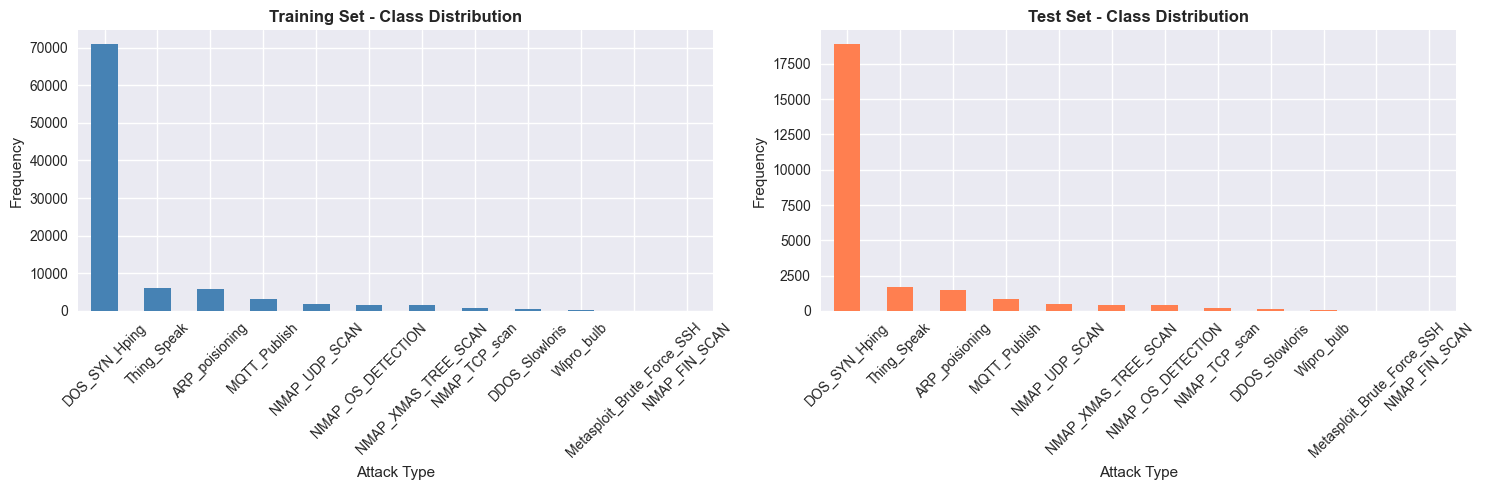


Class Distribution - Training Set:

Attack_type
DOS_SYN_Hping                 71027
Thing_Speak                    6025
ARP_poisioning                 5883
MQTT_Publish                   3050
NMAP_UDP_SCAN                  1943
NMAP_OS_DETECTION              1515
NMAP_XMAS_TREE_SCAN            1493
NMAP_TCP_scan                   769
DDOS_Slowloris                  404
Wipro_bulb                      188
Metasploit_Brute_Force_SSH       24
NMAP_FIN_SCAN                    16
Name: count, dtype: int64

Class Balance Ratio: 0.0002
Is Balanced: False


In [23]:
# Class distribution

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

train_dist = train_df['Attack_type'].value_counts()
test_dist = test_df['Attack_type'].value_counts()

train_dist.plot(kind='bar', ax=axes[0], color='steelblue')
axes[0].set_title('Training Set - Class Distribution', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Attack Type')
axes[0].set_ylabel('Frequency')
axes[0].tick_params(axis='x', rotation=45)

test_dist.plot(kind='bar', ax=axes[1], color='coral')
axes[1].set_title('Test Set - Class Distribution', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Attack Type')
axes[1].set_ylabel('Frequency')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.savefig('../results/figures/class_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

# Class balance analysis
print("\nClass Distribution - Training Set:\n")
print(train_dist)
print(f"\nClass Balance Ratio: {train_dist.min() / train_dist.max():.4f}")
print(f"Is Balanced: {train_dist.min() / train_dist.max() > 0.5}")


In [ ]:
print("Descriptive Statistics for Numeric Features:")
numeric_cols = train_df.select_dtypes(include=[np.number]).columns
train_df[numeric_cols].describe()

Descriptive Statistics for Numeric Features:


,id,id.orig_p,id.resp_p,flow_duration,fwd_pkts_tot,bwd_pkts_tot,fwd_data_pkts_tot,bwd_data_pkts_tot,fwd_pkts_per_sec,bwd_pkts_per_sec,flow_pkts_per_sec,down_up_ratio,fwd_header_size_tot,fwd_header_size_min,fwd_header_size_max,bwd_header_size_tot,bwd_header_size_min,bwd_header_size_max,flow_FIN_flag_count,flow_SYN_flag_count,flow_RST_flag_count,fwd_PSH_flag_count,bwd_PSH_flag_count,flow_ACK_flag_count,fwd_URG_flag_count,bwd_URG_flag_count,flow_CWR_flag_count,flow_ECE_flag_count,fwd_pkts_payload.min,fwd_pkts_payload.max,fwd_pkts_payload.tot,fwd_pkts_payload.avg,fwd_pkts_payload.std,bwd_pkts_payload.min,bwd_pkts_payload.max,bwd_pkts_payload.tot,bwd_pkts_payload.avg,bwd_pkts_payload.std,flow_pkts_payload.min,flow_pkts_payload.max,flow_pkts_payload.tot,flow_pkts_payload.avg,flow_pkts_payload.std,fwd_iat.min,fwd_iat.max,fwd_iat.tot,fwd_iat.avg,fwd_iat.std,bwd_iat.min,bwd_iat.max,bwd_iat.tot,bwd_iat.avg,bwd_iat.std,flow_iat.min,flow_iat.max,flow_iat.tot,flow_iat.avg,flow_iat.std,payload_bytes_per_second,fwd_subflow_pkts,bwd_subflow_pkts,fwd_subflow_bytes,bwd_subflow_bytes,fwd_bulk_bytes,bwd_bulk_bytes,fwd_bulk_packets,bwd_bulk_packets,fwd_bulk_rate,bwd_bulk_rate,active.min,active.max,active.tot,active.avg,active.std,idle.min,idle.max,idle.tot,idle.avg,idle.std,fwd_init_window_size,bwd_init_window_size,fwd_last_window_size
count,92337.000000,92337.000000,92337.000000,92337.000000,92337.000000,92337.000000,92337.000000,92337.000000,9.233700e+04,9.233700e+04,9.233700e+04,92337.000000,92337.000000,92337.000000,92337.000000,92337.000000,92337.000000,92337.000000,92337.000000,92337.000000,92337.000000,92337.000000,92337.000000,92337.000000,92337.000000,92337.0,92337.000000,92337.000000,92337.000000,92337.000000,92337.000000,92337.000000,92337.000000,92337.000000,92337.000000,9.233700e+04,92337.000000,92337.000000,92337.000000,92337.000000,9.233700e+04,92337.000000,92337.000000,9.233700e+04,9.233700e+04,9.233700e+04,9.233700e+04,9.233700e+04,9.233700e+04,9.233700e+04,9.233700e+04,9.233700e+04,9.233700e+04,9.233700e+04,9.233700e+04,9.233700e+04,9.233700e+04,9.233700e+04,9.233700e+04,92337.000000,92337.000000,92337.000000,9.233700e+04,92337.000000,9.233700e+04,92337.000000,92337.000000,9.233700e+04,9.233700e+04,9.233700e+04,9.233700e+04,9.233700e+04,9.233700e+04,9.233700e+04,9.233700e+04,9.233700e+04,9.233700e+04,9.233700e+04,9.233700e+04,92337.000000,92337.000000,92337.000000
mean,37098.792987,34646.767742,1015.004094,4.046150,2.296793,1.938183,1.483382,0.847353,3.520342e+05,3.519918e+05,7.040259e+05,0.854188,54.453274,19.771879,20.633159,48.022050,17.676078,18.407616,0.115284,0.950204,0.795921,0.353694,0.402515,2.752277,0.016137,0.0,0.001126,0.000791,96.322861,120.475183,222.071282,100.512140,7.979383,3.836425,52.030649,5.592398e+02,18.693613,20.395499,13.630581,148.183188,7.813110e+02,64.987247,75.904365,7.314454e+03,1.699603e+06,4.017375e+06,2.341820e+05,5.707726e+05,3.865616e+03,4.089473e+05,1.948752e+06,8.846248e+04,1.471943e+05,4.714174e+03,1.705941e+06,4.047197e+06,1.388468e+05,4.445355e+05,4.106853e+07,1.548055,1.334127,135.700503,2.172411e+02,22.418044,1.792985e+02,0.025765,0.148428,3.847296e+03,4.851344e+04,1.324393e+05,1.808875e+05,2.900539e+05,1.484548e+05,2.533878e+04,1.594377e+06,1.682264e+06,3.757143e+06,1.644433e+06,4.610874e+04,6083.857933,2728.888690,762.470212
std,30463.634584,19082.449153,5265.706203,145.446486,24.530446,37.560458,21.507715,36.790491,3.710062e+05,3.710417e+05,7.420456e+05,0.337830,432.382156,5.348109,7.219321,1182.076926,7.998361,9.397509,0.474504,0.474267,0.437384,4.280147,6.740439,47.573498,0.126001,0.0,0.047449,0.034349,45.132412,119.886884,5040.666267,45.817514,44.419946,19.696968,230.453765,4.865213e+04,83.203942,93.020817,35.437167,217.427291,4.912908e+04,49.930658,73.796137,1.011552e+06,9.156881e+06,1.454170e+08,1.788144e+06,3.206734e+06,2.398804e+05,4.288895e+06,1.034948e+08,1.117528e+06,1.772448e+06,2.871736e+05,9.185596e+06,1.454468e+08,8.870328e+05,2.484496e+06,4.488812e+07,2.772317,6.510076,41

In [22]:
# Missing values analysis

missing_train = train_df.isnull().sum()
missing_test = test_df.isnull().sum()

print("Missing Values - Training Set:")
missing_train[missing_train > 0].sort_values(ascending=False)

if missing_train.sum() == 0:
    print("No missing values in training set!")
else:
    missing_pct = (missing_train / len(train_df)) * 100
    print(f"\nMissing values percentage:")
    print(missing_pct[missing_pct > 0].sort_values(ascending=False))


Missing Values - Training Set:
No missing values in training set!


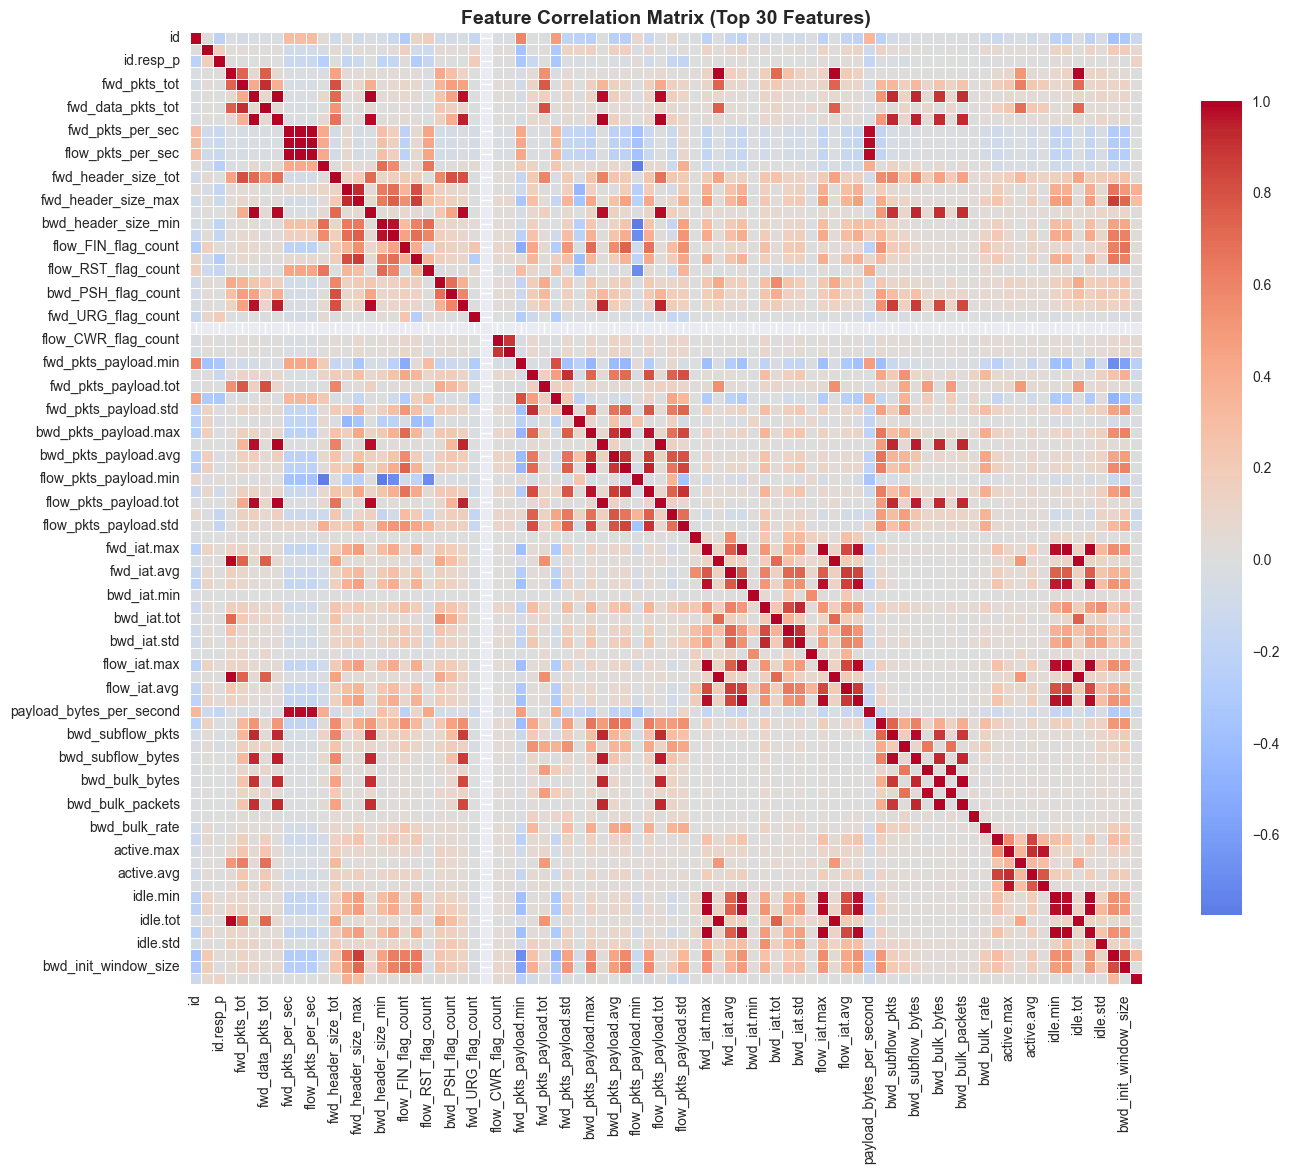

In [8]:
# Correlation matrix (for top features)

numeric_cols = train_df.select_dtypes(include=[np.number]).columns
numeric_cols = [col for col in numeric_cols if col != 'Attack_type']

# Select top 30 features by variance for visualization

if len(numeric_cols) > 30:
    variances = pd.Series(train_df[numeric_cols].var()).sort_values(ascending=False)
    top_features = variances.head(30).index.tolist()
    numeric_cols = top_features

corr_matrix = train_df.corr(numeric_only=True)

plt.figure(figsize=(14, 12))
sns.heatmap(
    corr_matrix,
    annot=False,
    cmap='coolwarm',
    center=0,
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.8}
)
plt.title('Feature Correlation Matrix (Top 30 Features)', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig('../results/figures/correlation_matrix.png', dpi=300, bbox_inches='tight')
plt.show()


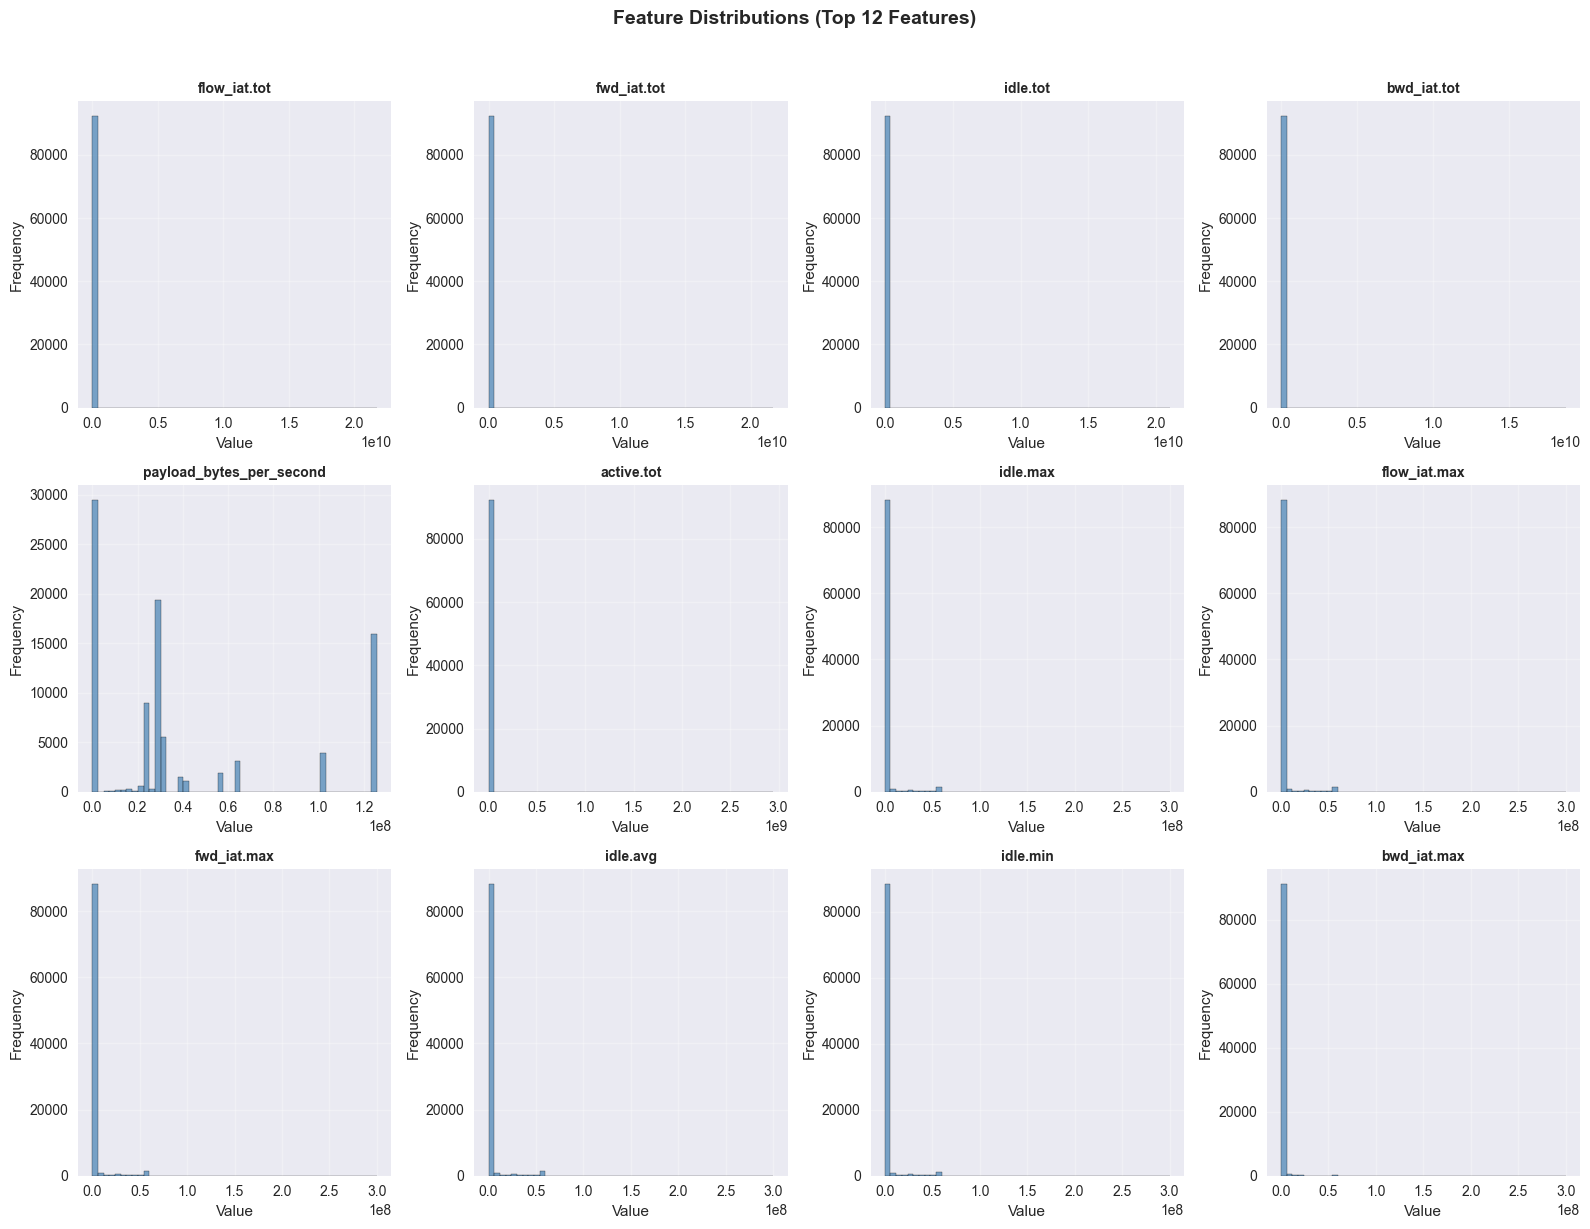

In [11]:
# Select top 12 features by variance

variances = pd.Series(train_df[numeric_cols].var()).sort_values(ascending=False)
top_features = variances.head(12).index.tolist()

n_cols = 4
n_rows = 3

fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 12))
axes = axes.flatten()

for idx, col in enumerate(top_features):
    train_df[col].hist(bins=50, ax=axes[idx], alpha=0.7, edgecolor='black', color='steelblue')
    axes[idx].set_title(f'{col}', fontsize=10, fontweight='bold')
    axes[idx].set_xlabel('Value')
    axes[idx].set_ylabel('Frequency')
    axes[idx].grid(True, alpha=0.3)

plt.suptitle('Feature Distributions (Top 12 Features)', fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.savefig('../results/figures/feature_distributions.png', dpi=300, bbox_inches='tight')
plt.show()


In [ ]:
# Outlier detection using IQR method

def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return len(outliers), (len(outliers) / len(df)) * 100

outlier_summary = []
for col in numeric_cols[:20]:
    count, pct = detect_outliers_iqr(train_df, col)
    if count > 0:
        outlier_summary.append({'Feature': col, 'Outliers': count, 'Percentage': pct})

if outlier_summary:
    outlier_df = pd.DataFrame(outlier_summary).sort_values('Percentage', ascending=False)
    print("Outliers detected (Top 10):\n")
    print(outlier_df.head(10).to_string(index=False))
else:
    print("No significant outliers detected in checked features")


Outliers detected (Top 10):

            Feature  Outliers  Percentage
bwd_header_size_tot     24849   26.911206
bwd_header_size_max     24840   26.901459
       bwd_pkts_tot     24255   26.267910
bwd_header_size_min     24025   26.018822
          id.resp_p     21306   23.074174
flow_SYN_flag_count     20470   22.168795
      down_up_ratio     19315   20.917942
fwd_header_size_tot     18286   19.803546
fwd_header_size_max     18281   19.798131
  fwd_data_pkts_tot     18051   19.549043


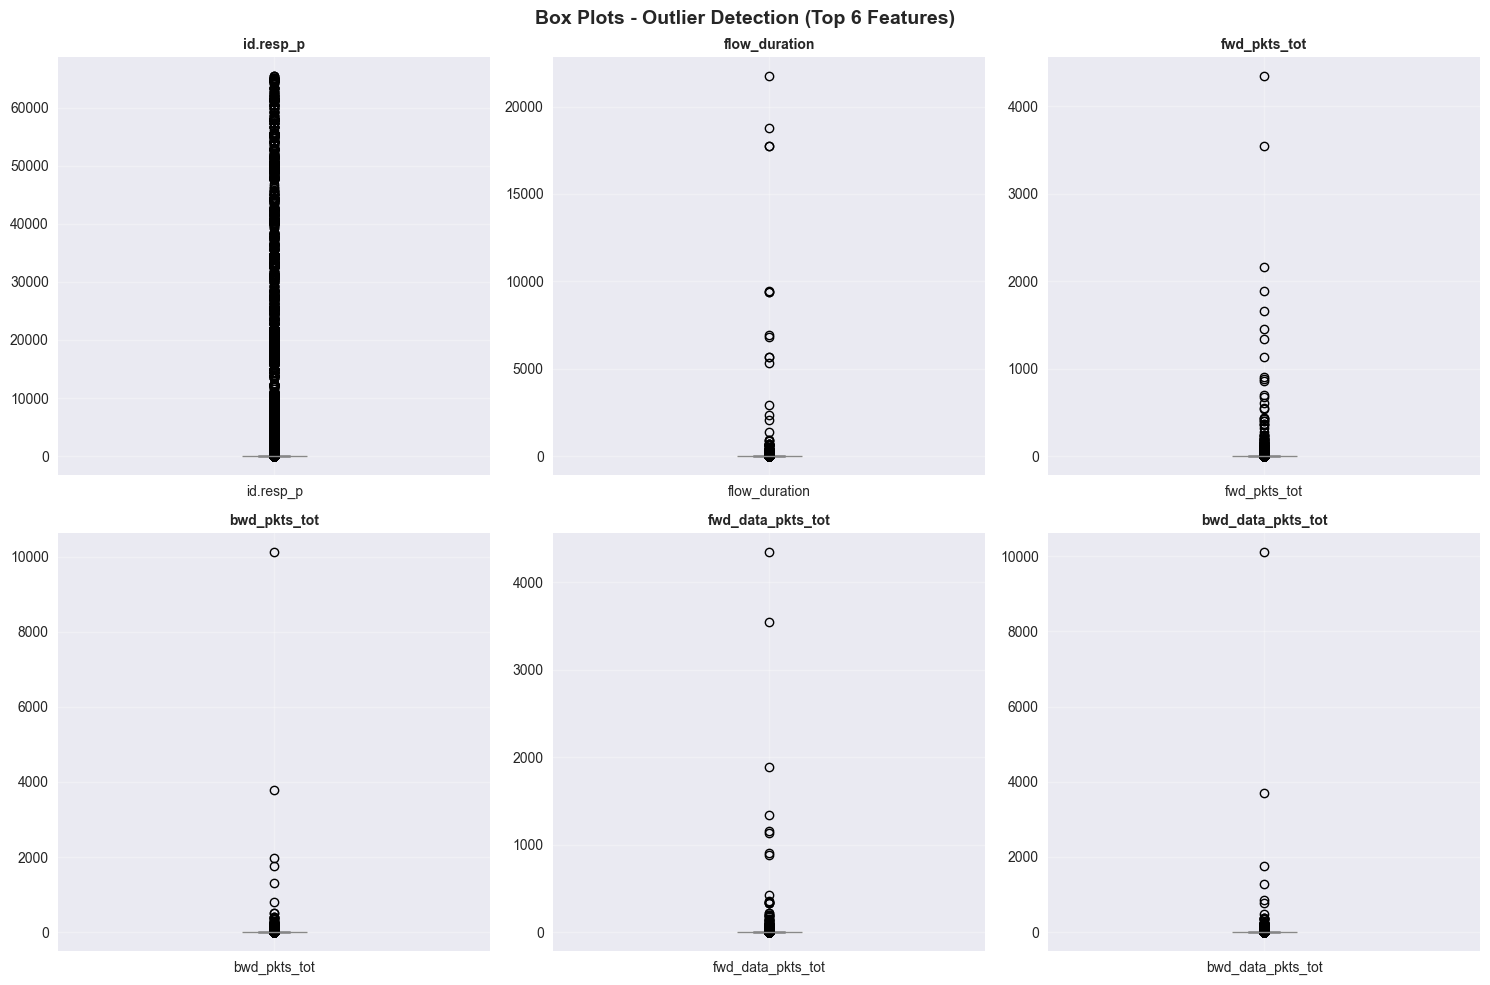

In [ ]:
# Box plots for outlier visualization (top 6 features with outliers)

if outlier_summary:
    top_outlier_features = pd.DataFrame(outlier_summary).head(6)['Feature'].tolist()
    
    fig, axes = plt.subplots(2, 3, figsize=(15, 10))
    axes = axes.flatten()
    
    for idx, col in enumerate(top_outlier_features):
        train_df.boxplot(column=col, ax=axes[idx], vert=True)
        axes[idx].set_title(f'{col}', fontsize=10, fontweight='bold')
        axes[idx].grid(True, alpha=0.3)
    
    plt.suptitle('Box Plots - Outlier Detection (Top 6 Features)', fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.savefig('../results/figures/boxplots_outliers.png', dpi=300, bbox_inches='tight')
    plt.show()
else:
    print("No outliers to visualize")
